<a href="https://colab.research.google.com/github/Cycyplay/M2_DeepLearning_Classification/blob/main/DeepLearning_Projet_Classification_Version_de_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet M2 Deep Learning Classification 
## Version de Base

MURATI Vidan - VAN Cyril

Classification d'oeuvres par leur courant artistique.

## Catégories

- Impressionisme
- Surréalisme
- Cubisme
- Baroque
- Pointillisme / Divisionisme
- Pop Art
- Expressionisme
- Maniérisme
- Néo-classicisme

# Code

### Setup

In [2]:
import keras
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Initialisation (array formating)

Liste des actions à effectuer:

1. Refaire les échantillons de chaque catégorie
2. Composer les tableaux numpy x_train, y_train, x_test, y_test
3. Les permuter à l'aide de numpy.random.permutation
4. Sauvegarder les 4 tableaux mélangés deux à deux
5. Mettre x_train et x_test au bon format ?

#### Transform data to float32

In [3]:
x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test.npy')
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test.npy')
y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train.npy')

In [4]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(6840, 64, 64, 3)
(6840,)
(1701, 64, 64, 3)
(1701,)


In [5]:
x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test.npy')
x_test = x_test.astype('float32') / 255.0
np.save('./drive/MyDrive/DeepLearning_Dataset/x_test_float32.npy', x_test)

In [6]:
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train.npy')


x_train = x_train.astype('float32') / 255.0
np.save('./drive/MyDrive/DeepLearning_Dataset/x_train_float32.npy', x_train)

#### Shuffle datasets

In [7]:
x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test_float32.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test.npy')

#mélange des datasets
test_permutation = np.random.permutation(len(x_test))

x_test = x_test[test_permutation]
y_test = y_test[test_permutation]

np.save('./drive/MyDrive/DeepLearning_Dataset/x_test_shuffled.npy', x_test)
np.save('./drive/MyDrive/DeepLearning_Dataset/y_test_shuffled.npy', y_test)

In [8]:
y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train.npy')

train_permutation = np.random.RandomState(seed=42).permutation(len(y_train))

y_train = y_train[train_permutation]

np.save('./drive/MyDrive/DeepLearning_Dataset/y_train_shuffled.npy', y_train)

In [11]:
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train_float32.npy')

train_permutation = np.random.RandomState(seed=42).permutation(len(x_train))

x_train = x_train[train_permutation]

np.save('./drive/MyDrive/DeepLearning_Dataset/x_train_shuffled.npy', x_train)

## Travail sans Data Augmentation

### Récupération des Datasets

In [12]:
x_test = np.load('./drive/MyDrive/DeepLearning_Dataset/x_test_shuffled.npy')
x_train = np.load('./drive/MyDrive/DeepLearning_Dataset/x_train_shuffled.npy')
y_test = np.load('./drive/MyDrive/DeepLearning_Dataset/y_test_shuffled.npy')
y_train = np.load('./drive/MyDrive/DeepLearning_Dataset/y_train_shuffled.npy')

### Modèle 1

In [ ]:
model_1 = keras.Sequential()
model_1.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_1.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model_1.add(keras.layers.Flatten())
model_1.add(keras.layers.Dense(128, activation='relu'))
model_1.add(keras.layers.Dense(9, activation='softmax'))
model_1.summary()

model_1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_1 = model_1.fit(x_train, y_train, verbose=1, batch_size=128, epochs=100, validation_data=(x_test, y_test))

In [34]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 1s 9ms/step - loss: 5.8448 - accuracy: 0.3568
Test accuracy: 0.35684892535209656
Test loss: 5.844811916351318


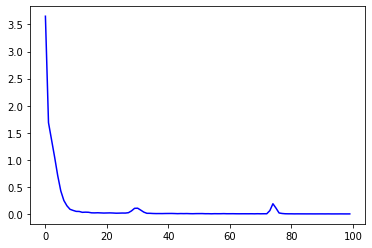

In [21]:
import matplotlib.pyplot as plt
plt.plot(history_1.history["loss"], "b")

### Modèle 2

In [ ]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Conv2D(64, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_2.add(keras.layers.Flatten())
model_2.add(keras.layers.Dense(128, activation='relu'))
model_2.add(keras.layers.Dense(9, activation='softmax'))
model_2.summary()

model_2.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, verbose=1, batch_size=128, epochs=100, validation_data=(x_test, y_test))

In [33]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 5ms/step - loss: 5.5380 - accuracy: 0.3780
Test accuracy: 0.37801292538642883
Test loss: 5.537961959838867


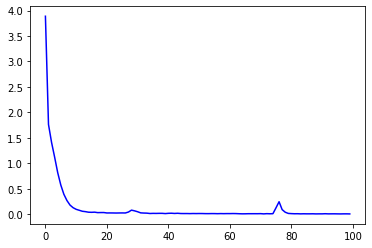

In [25]:
import matplotlib.pyplot as plt
plt.plot(history_2.history["loss"], "b")

### Modèle 3

In [ ]:
model_3 = keras.Sequential()
model_3.add(keras.layers.Conv2D(32, 3, activation='relu', input_shape=(64, 64, 3), padding='same'))
model_3.add(keras.layers.Flatten())
model_3.add(keras.layers.Dense(64, activation='relu'))
model_3.add(keras.layers.Dense(9, activation='softmax'))
model_3.summary()

model_3.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, verbose=1, batch_size=128, epochs=60, validation_data=(x_test, y_test))

In [32]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))

54/54 [==============================] - 0s 5ms/step - loss: 4.2987 - accuracy: 0.3445
Test accuracy: 0.3445032238960266
Test loss: 4.298705101013184


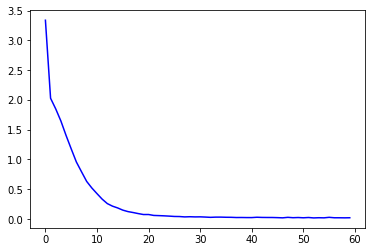

In [28]:
import matplotlib.pyplot as plt
plt.plot(history_3.history["loss"], "b")